In [1]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ –∏ –º–æ–¥—É–ª–µ–π

import warnings
warnings.filterwarnings("ignore")

import json
import string

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pyarrow as pa
import pyarrow.parquet as pq 
import pandas as pd
from pandas_profiling import ProfileReport

import re
import numpy as np

import nltk
from nltk import FreqDist
#nltk.download('popular')
from nltk.corpus import stopwords

from pymystem3 import Mystem

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.layers import Dense, Flatten, Embedding, Conv1D, Activation
from tensorflow.keras.layers import BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import L2

In [2]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º —Ç—Ä–µ–Ω–µ—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ñ–∞–π–ª–∞ .parquet

df_train = pq.read_table('train.parquet').to_pandas()
df_train.head()

product_id  category_id   sale  shop_id           shop_title  rating  \
0      325286        12171  False     9031                Aksik     5.0   
1      888134        14233  False    18305                 Sela     5.0   
3     1267173        13429  False    16357  –Æ–ù–õ–ê–ù–î–ò–Ø –∫–∞–Ω—Ü—Ç–æ–≤–∞—Ä—ã     5.0   
4     1416943         2789  False    34666        –≤–∞—Å—è-nicotine     4.0   
5     1058275        12834  False    26389           Lim Market     4.6   

                                         text_fields  \
0  {"title": "–ó–∞—Ä—è–¥–Ω—ã–π –∫–∞–±–µ–ª—å Borofone BX1 Lightn...   
1  {"title": "–¢—Ä—É—Å—ã Sela", "description": "–¢—Ä—É—Å—ã-...   
3  {"title": "–ì—É–∞—à—å \"–Æ–ù–´–ô –í–û–õ–®–ï–ë–ù–ò–ö\", 12 —Ü–≤–µ—Ç–æ–≤...   
4  {"title": "–ö–æ–ª–±–∞ –¥–ª—è –∫–∞–ª—å—è–Ω–∞ –ö—Ä–∞—Ñ—Ç (—Ä–∞–∑–Ω—ã–µ —Ü–≤–µ...   
5  {"title": "–ü–∏–∂–∞–º–∞ –∂–µ–Ω—Å–∫–∞—è, –æ–¥–Ω–æ—Ç–æ–Ω–Ω–∞—è —Å —à–æ—Ä—Ç–∞–º...   

                                       category_name  
0  –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏->–≠–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞->–°–º–∞—Ä—Ç—Ñ–æ–Ω—ã –∏ —Ç–µ–ª–µ—Ñ–æ...  
1  –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏->–û–¥–µ–∂–¥–∞->–ñ–µ–Ω—Å–∫–∞—è –æ–¥–µ–∂–¥–∞->–ë–µ–ª—å–µ –∏...  
3  –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏->–•–æ–±–±–∏ –∏ —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–æ->–†–∏—Å–æ–≤–∞–Ω–∏–µ->...  
4  –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏->–•–æ–±–±–∏ –∏ —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–æ->–¢–æ–≤–∞—Ä—ã –¥–ª—è ...  
5  –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏->–û–¥–µ–∂–¥–∞->–ñ–µ–Ω—Å–∫–∞—è –æ–¥–µ–∂–¥–∞->–î–æ–º–∞—à–Ω—è...

In [3]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –¥—É–±–ª–∏—Ä—É—é—â–∏—Ö –∑–∞–ø–∏—Å–µ–π –∏ –≤—ã–≤–æ–¥–∏–º –µ–≥–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å

print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏—Ä—É—é—â–∏—Ö—Å—è –∑–∞–ø–∏—Å–µ–π - ', len(df_train[df_train.duplicated()].values))
df_train.shape

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏—Ä—É—é—â–∏—Ö—Å—è –∑–∞–ø–∏—Å–µ–π -  0


(91120, 8)

In [4]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91120 entries, 0 to 99992
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     91120 non-null  int64  
 1   category_id    91120 non-null  int64  
 2   sale           91120 non-null  bool   
 3   shop_id        91120 non-null  int64  
 4   shop_title     91120 non-null  object 
 5   rating         91120 non-null  float64
 6   text_fields    91120 non-null  object 
 7   category_name  91120 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 5.6+ MB


In [5]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

df_train.category_id.value_counts()

11937    6590
14922    3709
13651    1463
13143    1460
12980    1222
         ... 
12808       2
12901       1
11549       1
11875       1
12836       1
Name: category_id, Length: 874, dtype: int64

–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∏–º–µ–µ—Ç 874 –∫–ª–∞—Å—Å–∞, –ø—Ä–∏ —ç—Ç–æ–º –∫–ª–∞—Å—Å—ã —Å–∏–ª—å–Ω–æ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã, –º–∏–Ω–æ—Ä–∏—Ç–∞—Ä–Ω—ã–π –∫–ª–∞—Å—Å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω 1 —Ç–æ–≤–∞—Ä–æ–º, –º–∞–∂–æ—Ä–∏—Ç–∞—Ä–Ω—ã–π - 6590.

In [6]:
# –í—ã–ø–æ–ª–Ω–∏–º EDA —Å –ø–æ–º–æ—â—å—é –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ pandas_profiling –¥–ª—è –Ω–µ—Ç–µ–∫—Å—Ç–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤

columns = ['product_id', 'category_id', 'sale', 'shop_id', 'shop_title', 'rating']

profile = ProfileReport(df_train[columns], title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# –ü—Ä–æ—Å–º–æ—Ç—Ä–∏–º —Å—Ç—Ä—É–∫—Ç—É—Ä—É —Å—Ç–æ–ª–±—Ü–∞ text_fields —Å —Ç–µ–∫—Å—Ç–æ–≤–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π

df_train.text_fields[0]

'{"title": "–ó–∞—Ä—è–¥–Ω—ã–π –∫–∞–±–µ–ª—å Borofone BX1 Lightning –¥–ª—è –∞–π—Ñ–æ–Ω, 1–º", "description": "<p><span style=\\"background-color: transparent; color: rgb(0, 26, 52);\\">–ó–∞—Ä—è–¥–Ω—ã–π –∫–∞–±–µ–ª—å Borofone BX1 –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –∑–∞—Ä—è–¥–∫–∏ –≤—Å–µ—Ö –≥–∞–¥–∂–µ—Ç–æ–≤ –∏ –∞–∫—Å–µ—Å—Å—É–∞—Ä–æ–≤ —Å —Ä–∞–∑—ä–µ–º–æ–º </span>Lightning.</p><p><span style=\\"color: rgb(0, 26, 52); background-color: transparent;\\">–ü–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –±—ã—Å—Ç—Ä—É—é –∑–∞—Ä—è–¥–∫—É.</span></p><p><span style=\\"color: rgb(0, 26, 52); background-color: transparent;\\">–ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –ø–µ—Ä–µ–¥–∞—á–∏ –¥–∞–Ω–Ω—ã—Ö.</span></p>", "attributes": ["–î–ª–∏–Ω–∞: 1–º", "–†–∞–∑—ä–µ–º: Lightning", "–ü–æ–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –±—ã—Å—Ç—Ä—É—é –∑–∞—Ä—è–¥–∫—É", "–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Ç–æ–∫: 2.0–ê", "–î–ª—è –∑–∞—Ä—è–¥–∫–∏ –∏ —Å–∏–Ω—Ö—Ä–æ–Ω–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö", "–í–µ—Å: 22 –≥."], "custom_characteristics": {}, "defined_characteristics": {"–¶–≤–µ—Ç": ["–ß–µ—Ä–Ω—ã–π", "–ë–µ–ª—ã–π"]}, "filters": 

In [8]:
# –°—Ç—Ä—É–∫—Ç—É—Ä–∞ –ø–æ—Ö–æ–∂–∞ –Ω–∞ json —Ñ–æ—Ä–º–∞—Ç, —Ä–∞–∑–¥–µ–ª–∏–º —Å—Ç–æ–ª–±–µ—Ü text_fields –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å—Ç–æ–ª–±—Ü–æ–≤ —Å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –∫–ª—é—á–∞–º –≤–ª–æ–∂–µ–Ω–Ω—ã—Ö 
# —Å–ª–æ–≤–∞—Ä–µ–π –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ —Å—Ç–æ–ª–±—Ü–æ–≤.

text_fields = [json.loads(elem) for elem in df_train.text_fields.tolist()]
idx = df_train.index.tolist()
df = pd.DataFrame(text_fields, index=idx)
df.iloc[10:15, :]

title  \
11  –ê–ø–ø–ª–∏–∫–∞—Ü–∏–∏ –¥–ª—è –¥–µ—Ç–µ–π —Å –Ω–∞–∫–ª–µ–π–∫–∞–º–∏, 2 –ª–∏—Å—Ç–∞, 20...   
12  –§–ª–µ—à–∫–∞ 3 –≤ 1-–Ω–∞–∫–æ–ø–∏—Ç–µ–ª—å Micro USB,Type-C, 4gb,...   
13                                   –§—É—Ç–±–æ–ª–∫–∞ –º—É–∂—Å–∫–∞—è   
14                   –°—É–≤–µ–Ω–∏—Ä–Ω—ã–µ –¥–µ–Ω—å–≥–∏, –±–∞–Ω–∫ –ø—Ä–∏–∫–æ–ª–æ–≤   
15                      –¢–∞–ø–æ—á–∫–∏ –¥–ª—è –¥–µ–≤–æ—á–µ–∫ –∫–æ–º–Ω–∞—Ç–Ω—ã–µ   

                                          description  \
11  <p>–ê–ø–ø–ª–∏–∫–∞—Ü–∏–∏ –¥–ª—è –¥–µ—Ç–µ–π —Å –Ω–∞–∫–ª–µ–π–∫–∞–º–∏, –¥–≤–∞ –ª–∏—Å—Ç...   
12  <p><strong>–û —Ä–µ–∞–ª—å–Ω–æ–π –µ–º–∫–æ—Å—Ç–∏</strong></p><p>4...   
13                                        100% —Ö–ª–æ–ø–æ–∫   
14  <p>–Æ–º–æ—Ä ‚Äì –Ω–∞—Å—Ç–æ—è—â–µ–µ –±–æ–≥–∞—Ç—Å—Ç–≤–æ!</p><p>–ö—É–ø—é—Ä—ã –≤ ...   
15  <p>–õ–µ–≥–∫–∞—è –ø–æ–¥–æ—à–≤–∞, –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω–∞—è –∏–∑ —ç–∫–æ–ª–æ–≥–∏—á–µ—Å–∫–æ...   

                                           attributes  \
11  [–ù–∞ –æ–¥–Ω–æ–º –ª–∏—Å—Ç–µ –Ω–µ–±–æ–ª—å—à–∞—è —Ä–∞—Å–∫—Ä–∞—Å–∫–∞., –ú–∞—Ç–µ—Ä–∏–∞–ª...   
12  [–ø–∞–º—è—Ç—å –¥–ª—è –Ω–æ—É—Ç–±—É–∫–∞ –ø–∫, —Ñ–ª–µ—à–∫–∞ –¥–ª—è —Ç–µ–ª–µ–≤–∏–∑–æ—Ä–∞...   
13                                                 []   
14                          [–û–∫–æ–ª–æ 90 –ª–∏—Å—Ç–æ–≤ –≤ –ø–∞—á–∫–µ]   
15                                                 []   

                               custom_characteristics  \
11                                                 {}   
12  {'–†–∞–∑–º–µ—Ä': ['64–≥–±', '4–≥–±', '8–≥–±', '16–≥–±', '32–≥...   
13                                                 {}   
14                                                 {}   
15                                                 {}   

                              defined_characteristics  \
11  {'–¶–≤–µ—Ç': ['–ê–ª—ã–π', '–†–æ–∑–æ–≤—ã–π', '–ö—Ä–∞—Å–Ω—ã–π', '–ë–µ–∂–µ–≤...   
12  {'–¶–≤–µ—Ç': ['–†–æ–∑–æ–≤—ã–π', '–ö—Ä–∞—Å–Ω—ã–π', '–§–∏–æ–ª–µ—Ç–æ–≤—ã–π', ...   
13    {'–†–∞–∑–º–µ—Ä –æ–¥–µ–∂–¥—ã': ['M', 'S', 'L', 'XXL', 'XL']}   
14  {'–¶–≤–µ—Ç': ['–ì–æ–ª—É–±–æ–π', '–§–∏–æ–ª–µ—Ç–æ–≤—ã–π', '–û—Ä–∞–Ω–∂–µ–≤—ã–π'...   
15             {'–î–µ—Ç—Å–∫–∏–π —Ä–∞–∑–º–µ—Ä –æ–±—É–≤–∏': ['34', '30']}   

                                              filters  
11  {'–¶–≤–µ—Ç': ['–ñ–µ–ª—Ç—ã–π', '–ì–æ–ª—É–±–æ–π', '–ë–µ–ª—ã–π', '–ë–µ–∂–µ–≤...  
12  {'–¶–≤–µ—Ç': ['–ß–µ—Ä–Ω—ã–π', '–†–æ–∑–æ–≤—ã–π', '–†–æ–∑–æ–≤—ã–π', '–ñ–µ–ª...  
13  {'–¢–∏–ø —Ñ—É—Ç–±–æ–ª–∫–∏': ['–§—É—Ç–±–æ–ª–∫–∞ —Å –∫–æ—Ä–æ—Ç–∫–∏–º–∏ —Ä—É–∫–∞–≤–∞...  
14  {'–¶–≤–µ—Ç': ['–§–∏–æ–ª–µ—Ç–æ–≤—ã–π', '–†–æ–∑–æ–≤—ã–π', '–ó–µ–ª–µ–Ω—ã–π', ...  
15  {'–ë—Ä–µ–Ω–¥': ['Smile of Milady', 'Smile of Milady...

In [9]:
# –í —Å—Ç–æ–ª–±—Ü–∞—Ö custom_characteristics, defined_characteristics, filters –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ –ø–æ—Ö–æ–∂–∞—è –∏–ª–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è, 
# –æ–±—ä–µ–¥–∏–Ω—è–µ–º –∏—Ö –≤–º–µ—Å—Ç–µ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–π —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏. –≠—Ç–æ –∂–µ –∫–∞—Å–∞–µ—Ç—Å—è —Å—Ç–æ–ª–±—Ü–æ–≤ description –∏ attributes.

df.description = df.apply(lambda x: str(x.description) + ' ' + str(x.attributes), axis=1)
df['characteristics'] = df.apply(lambda x: str(x.custom_characteristics) + str(x.defined_characteristics) + str(x.filters), axis=1)
df.drop(columns=['custom_characteristics', 'defined_characteristics', 'filters', 'attributes'], inplace=True)
df.head()

title  \
0  –ó–∞—Ä—è–¥–Ω—ã–π –∫–∞–±–µ–ª—å Borofone BX1 Lightning –¥–ª—è –∞–π—Ñ...   
1                                         –¢—Ä—É—Å—ã Sela   
3  –ì—É–∞—à—å "–Æ–ù–´–ô –í–û–õ–®–ï–ë–ù–ò–ö", 12 —Ü–≤–µ—Ç–æ–≤ –ø–æ 35 –º–ª, –ë–û...   
4             –ö–æ–ª–±–∞ –¥–ª—è –∫–∞–ª—å—è–Ω–∞ –ö—Ä–∞—Ñ—Ç (—Ä–∞–∑–Ω—ã–µ —Ü–≤–µ—Ç–∞)   
5               –ü–∏–∂–∞–º–∞ –∂–µ–Ω—Å–∫–∞—è, –æ–¥–Ω–æ—Ç–æ–Ω–Ω–∞—è —Å —à–æ—Ä—Ç–∞–º–∏   

                                         description  \
0  <p><span style="background-color: transparent;...   
1  –¢—Ä—É—Å—ã-—Å–ª–∏–ø—ã –∏–∑ —ç–ª–∞—Å—Ç–∏—á–Ω–æ–≥–æ –±–µ—Å—à–æ–≤–Ω–æ–≥–æ —Ç—Ä–∏–∫–æ—Ç–∞–∂...   
3  <p>–ì—É–∞—à—å –≤—ã—Å—à–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –Æ–ù–õ–ê–ù–î–ò–Ø –ø–æ–º–æ–∂–µ—Ç —Å–æ–∑...   
4  <p><span style="color: rgb(149, 151, 153);">–£–Ω...   
5  <p>–õ—ë–≥–∫–∞—è —Ç–∫–∞–Ω—å! –ö–æ–º—Ñ–æ—Ä—Ç–Ω–∞—è –ø–æ—Å–∞–¥–∫–∞! –ò–¥–µ–∞–ª—å–Ω–∞—è...   

                                     characteristics  
0  {}{'–¶–≤–µ—Ç': ['–ß–µ—Ä–Ω—ã–π', '–ë–µ–ª—ã–π']}{'–¶–≤–µ—Ç': ['–ë–µ–ª—ã...  
1  {}{'–†–∞–∑–º–µ—Ä –æ–¥–µ–∂–¥—ã': ['S']}{'–ë—Ä–µ–Ω–¥': ['Sela'], ...  
3                        {}{}{'–ë—Ä–µ–Ω–¥': ['–Æ–Ω–ª–∞–Ω–¥–∏—è']}  
4  {}{'–¶–≤–µ—Ç': ['–•—Ä–æ–º', '–†–æ–∑–æ–≤—ã–π', '–ñ–µ–ª—Ç—ã–π', '–ü—Ä–æ–∑...  
5  {}{'–†–∞–∑–º–µ—Ä –æ–¥–µ–∂–¥—ã': ['XXXL', 'L', 'XXL', 'XL']...

In [10]:
# –í–Ω–æ—Å–∏–º —Å—Ç–æ–ª–±—Ü—ã title, description –∏ characteristic –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, —É–¥–∞–ª—è—è –ø—Ä–∏ —ç—Ç–æ–º text_fields
# –∫–∞–∫ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ

df_train = pd.concat([df_train, df], axis=1)
df_train.drop(columns=['text_fields'], inplace=True)
df_train.head()

product_id  category_id   sale  shop_id           shop_title  rating  \
0      325286        12171  False     9031                Aksik     5.0   
1      888134        14233  False    18305                 Sela     5.0   
3     1267173        13429  False    16357  –Æ–ù–õ–ê–ù–î–ò–Ø –∫–∞–Ω—Ü—Ç–æ–≤–∞—Ä—ã     5.0   
4     1416943         2789  False    34666        –≤–∞—Å—è-nicotine     4.0   
5     1058275        12834  False    26389           Lim Market     4.6   

                                       category_name  \
0  –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏->–≠–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞->–°–º–∞—Ä—Ç—Ñ–æ–Ω—ã –∏ —Ç–µ–ª–µ—Ñ–æ...   
1  –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏->–û–¥–µ–∂–¥–∞->–ñ–µ–Ω—Å–∫–∞—è –æ–¥–µ–∂–¥–∞->–ë–µ–ª—å–µ –∏...   
3  –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏->–•–æ–±–±–∏ –∏ —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–æ->–†–∏—Å–æ–≤–∞–Ω–∏–µ->...   
4  –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏->–•–æ–±–±–∏ –∏ —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–æ->–¢–æ–≤–∞—Ä—ã –¥–ª—è ...   
5  –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏->–û–¥–µ–∂–¥–∞->–ñ–µ–Ω—Å–∫–∞—è –æ–¥–µ–∂–¥–∞->–î–æ–º–∞—à–Ω—è...   

                                               title  \
0  –ó–∞—Ä—è–¥–Ω—ã–π –∫–∞–±–µ–ª—å Borofone BX1 Lightning –¥–ª—è –∞–π—Ñ...   
1                                         –¢—Ä—É—Å—ã Sela   
3  –ì—É–∞—à—å "–Æ–ù–´–ô –í–û–õ–®–ï–ë–ù–ò–ö", 12 —Ü–≤–µ—Ç–æ–≤ –ø–æ 35 –º–ª, –ë–û...   
4             –ö–æ–ª–±–∞ –¥–ª—è –∫–∞–ª—å—è–Ω–∞ –ö—Ä–∞—Ñ—Ç (—Ä–∞–∑–Ω—ã–µ —Ü–≤–µ—Ç–∞)   
5               –ü–∏–∂–∞–º–∞ –∂–µ–Ω—Å–∫–∞—è, –æ–¥–Ω–æ—Ç–æ–Ω–Ω–∞—è —Å —à–æ—Ä—Ç–∞–º–∏   

                                         description  \
0  <p><span style="background-color: transparent;...   
1  –¢—Ä—É—Å—ã-—Å–ª–∏–ø—ã –∏–∑ —ç–ª–∞—Å—Ç–∏—á–Ω–æ–≥–æ –±–µ—Å—à–æ–≤–Ω–æ–≥–æ —Ç—Ä–∏–∫–æ—Ç–∞–∂...   
3  <p>–ì—É–∞—à—å –≤—ã—Å—à–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –Æ–ù–õ–ê–ù–î–ò–Ø –ø–æ–º–æ–∂–µ—Ç —Å–æ–∑...   
4  <p><span style="color: rgb(149, 151, 153);">–£–Ω...   
5  <p>–õ—ë–≥–∫–∞—è —Ç–∫–∞–Ω—å! –ö–æ–º—Ñ–æ—Ä—Ç–Ω–∞—è –ø–æ—Å–∞–¥–∫–∞! –ò–¥–µ–∞–ª—å–Ω–∞—è...   

                                     characteristics  
0  {}{'–¶–≤–µ—Ç': ['–ß–µ—Ä–Ω—ã–π', '–ë–µ–ª—ã–π']}{'–¶–≤–µ—Ç': ['–ë–µ–ª—ã...  
1  {}{'–†–∞–∑–º–µ—Ä –æ–¥–µ–∂–¥—ã': ['S']}{'–ë—Ä–µ–Ω–¥': ['Sela'], ...  
3                        {}{}{'–ë—Ä–µ–Ω–¥': ['–Æ–Ω–ª–∞–Ω–¥–∏—è']}  
4  {}{'–¶–≤–µ—Ç': ['–•—Ä–æ–º', '–†–æ–∑–æ–≤—ã–π', '–ñ–µ–ª—Ç—ã–π', '–ü—Ä–æ–∑...  
5  {}{'–†–∞–∑–º–µ—Ä –æ–¥–µ–∂–¥—ã': ['XXXL', 'L', 'XXL', 'XL']...

In [12]:
# –í —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –ø—É–Ω–∫—Ç—É–∞—Ü–∏—è, html —Ç–µ–≥–∏, –∫–∏—Ä–∏–ª–ª–∏—á–µ—Å–∫–∏–µ –∏ –ª–∞—Ç–∏–Ω—Å–∫–∏–µ —Å–∏–º–≤–æ–ª—ã, —Ü–∏—Ñ—Ä—ã. –í —Å—Ç–æ–ª–±—Ü–∞ title –∏ 
# description —É–¥–∞–ª—è–µ–º –≤—Å–µ –Ω–µ –∫–∏—Ä–∏–ª–ª–∏—á–µ—Å–∫–∏–µ —Å–∏–º–≤–æ–ª—ã –∏ –≤—ã–ø–æ–ª–Ω—è–µ–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Å –ø–æ–º–æ—â—å—é –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ pymystem3
# –°—Ç–æ–ª–±–µ—Ü characteristics —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ä–∞–∑–º–µ—Ä–∞—Ö, –Ω–∞–∑–≤–∞–Ω–∏–∏ –±—Ä–µ–Ω–¥–∞ –∏ —Ç.–¥., —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –¥–ª—è –Ω–µ–≥–æ —É–¥–∞–ª—è–µ–º —Å–∏–º–≤–æ–ª—ã, 
# –∫—Ä–æ–º–µ –±—É–∫–≤, —Ü–∏—Ñ—Ä –∏ –ø—Ä–æ–±–µ–ª–æ–≤ –∏ —Ç–∞–∫–∂–µ –≤—ã–ø–æ–ª–Ω—è–µ–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é. –°–ª–æ–≤–∞—Ä—å —Å—Ç–æ–ø-—Å–ª–æ–≤ nltk –¥–æ–ø–æ–ª–Ω–∏–º —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–º–∏—Å—è —Å–ª–æ–≤–∞–º–∏,
# –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –Ω–µ—Å—É—Ç —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–π —Å–º—ã—Å–ª–æ–≤–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏ –∏ –Ω–µ –∏–º–µ—é—Ç –ø–æ–ª—å–∑—ã –¥–ª—è –º–æ–¥–µ–ª–∏

mystem = Mystem()

def clean_text(data, flag):
    cleaned_text = []
    add_stopwords = ['—Ü–≤–µ—Ç', '–º–∞—Ç–µ—Ä–∏–∞–ª', '–≤–∞—à', '–ø–æ–¥—Ö–æ–¥–∏—Ç—å', '—Ç–æ–≤–∞—Ä', '–∫–æ—Ç–æ—Ä—ã–π', '—ç—Ç–æ', '—Ç–∏–ø', '–Ω–∞—à', '–º–∞–≥–∞–∑–∏–Ω', '—Ç–∞–∫–∂–µ', 
                     '—Å–æ—Å—Ç–∞–≤', '—Å–≤–æ–π', '–º—ã', '–¥–∞–Ω–Ω—ã–π', '—Ç–∞–∫–æ–π', '—Ä–∞–∑–º–µ—Ä', '–±–ª–∞–≥–æ–¥–∞—Ä—è', '–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å', '–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ', 
                     '–º–æ—á—å', '–∏–∑–¥–µ–ª–∏–µ', '–≤–∏–¥']
    stopword = stopwords.words('russian') + add_stopwords
    for text in data:
        text = str(text).lower()
        if flag == 'ru_simb':
            text = re.sub(r'[^\s–∞-—è—ë]', ' ', text).strip().split()
            text = ' '.join([mystem.lemmatize(word)[0] for word in text if not mystem.lemmatize(word)[0] in stopword and len(word)>2])
        else:
            text = re.sub(r'[^\s\w]', ' ', text).strip().split()
            text = ' '.join([mystem.lemmatize(word)[0] for word in text if not mystem.lemmatize(word)[0] in stopword])
        cleaned_text.append(text)        
    return cleaned_text

df_train['title'] = clean_text(df_train.title.tolist(), 'ru_simb')
df_train['description'] = clean_text(df_train.description.tolist(), 'ru_simb')
df_train['characteristics'] = clean_text(df_train.characteristics.tolist(), 'without_punctuation')

In [14]:
# –§–∏–ª—å—Ç—Ä—É–µ–º –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏—è —Ç–æ–∫–µ–Ω–æ–≤ –≤ characteristics –∏ –¥–æ–±–∞–≤–ª—è–µ–º id –º–∞–≥–∞–∑–∏–Ω–∞. –ù–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã, –∫–æ—Ç–æ—Ä—ã–µ –±–æ–ª—å—à–µ –Ω–µ –±—É–¥—É—Ç 
# –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É–¥–∞–ª—è–µ–º

df_train.characteristics = df_train.characteristics.apply(lambda x: ' '.join([i for n, i in enumerate(x.split()) 
                                                                              if i not in x.split()[:n]]))
df_train.characteristics = df_train.apply(lambda x: str(x.shop_id) + ' ' + x.characteristics, axis=1)
df_train.drop(columns=['shop_id', 'category_name', 'product_id', 'shop_title', 'rating', 'sale', 'shop_title'], inplace=True)
df_train.head()

category_id                                              title  \
0        12171                              –∑–∞—Ä—è–¥–Ω—ã–π –∫–∞–±–µ–ª—å –∞–π—Ñ–æ–Ω   
1        14233                                              —Ç—Ä—É—Å—ã   
3        13429  –≥—É–∞—à—å —é–Ω—ã–π –≤–æ–ª—à–µ–±–Ω–∏–∫ —Ü–≤–µ—Ç–æ–∫ –±–æ–ª—å—à–æ–π –±–∞–Ω–æ—á–∫–∞ –≤—ã...   
4         2789                          –∫–æ–ª–±–∞ –∫–∞–ª—å—è–Ω –∫—Ä–∞—Ñ—Ç —Ä–∞–∑–Ω—ã–π   
5        12834                    –ø–∏–∂–∞–º–∞ –∂–µ–Ω—Å–∫–∏–π –æ–¥–Ω–æ—Ç–æ–Ω–Ω—ã–π —à–æ—Ä—Ç—ã   

                                         description  \
0  –∑–∞—Ä—è–¥–Ω—ã–π –∫–∞–±–µ–ª—å –∑–∞—Ä—è–¥–∫–∞ –≥–∞–¥–∂–µ—Ç –∞–∫—Å–µ—Å—Å—É–∞—Ä —Ä–∞–∑—ä–µ...   
1  —Ç—Ä—É—Å—ã —Å–ª–∏–ø —ç–ª–∞—Å—Ç–∏—á–Ω—ã–π –±–µ—Å—à–æ–≤–Ω—ã–π —Ç—Ä–∏–∫–æ—Ç–∞–∂ –æ–¥–Ω–æ—Ç...   
3  –≥—É–∞—à—å –≤—ã—Å–æ–∫–∏–π –∫–∞—á–µ—Å—Ç–≤–æ —é–Ω–ª–∞–Ω–¥–∏—è –ø–æ–º–æ–≥–∞—Ç—å —Å–æ–∑–¥–∞...   
4  —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π –∫–æ–ª–±–∞ –∫–∞–ª—å—è–Ω —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–π –∫–∞–ª—å—è–Ω ...   
5  –ª–µ–≥–∫–∏–π —Ç–∫–∞–Ω—å –∫–æ–º—Ñ–æ—Ä—Ç–Ω—ã–π –ø–æ—Å–∞–¥–∫–∞ –∏–¥–µ–∞–ª—å–Ω—ã–π –¥–ª–∏–Ω...   

                                     characteristics  
0                                  9031 —á–µ—Ä–Ω—ã–π –±–µ–ª—ã–π  
1                   18305 —Ä–∞–∑–º–µ—Ä –æ–¥–µ–∂–¥–∞ s –±—Ä–µ–Ω–¥ sela  
3                               16357 –±—Ä–µ–Ω–¥ —é–Ω–ª–∞–Ω–¥–∏—è  
4  34666 —Ö—Ä–æ–º —Ä–æ–∑–æ–≤—ã–π –∂–µ–ª—Ç—ã–π –ø—Ä–æ–∑—Ä–∞—á–Ω—ã–π —Å–∏–Ω–∏–π —á–µ—Ä...  
5            26389 —Ä–∞–∑–º–µ—Ä –æ–¥–µ–∂–¥–∞ xxxl l xxl xl –±–µ–ª—ã–π

In [15]:
# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã –≤ –µ–¥–∏–Ω—ã–π –∫–æ—Ä–ø—É—Å –∏ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤

all_words = ' '.join(df_train.title.tolist()) + ' '.join(df_train.description.tolist()) + ' '.join(df_train.characteristics.tolist())
all_words = all_words.split()
print('–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤ - ', len(set(all_words)))
all_words[:5]

–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤ -  60537


['–∑–∞—Ä—è–¥–Ω—ã–π', '–∫–∞–±–µ–ª—å', '–∞–π—Ñ–æ–Ω', '—Ç—Ä—É—Å—ã', '–≥—É–∞—à—å']

In [16]:
# –°–æ—Å—Ç–∞–≤–∏–º —Å–ª–æ–≤–∞—Ä—å —á–∞—Å—Ç–æ—Ç—ã —Ç–æ–∫–µ–Ω–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ, –≥–¥–µ –∫–ª—é—á–∞–º–∏ —è–≤–ª—è–µ—Ç—Å—è —Ç–æ–∫–µ–Ω, –∞ –∑–Ω–∞—á–µ–Ω–∏–µ–º —á–∞—Å—Ç–æ—Ç–∞ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π. –ó–∞—Ç–µ–º –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
# –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –µ–≥–æ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º

freq_dist = FreqDist(all_words)
words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
words_df = words_df.sort_values('count', ascending=False)
words_df.head()

word  count
338  —Ä–∞–∑–º–µ—Ä  74845
33   —Å—Ç–µ–∫–ª–æ  41554
21    —á–µ—Ö–æ–ª  38801
45   —á–µ—Ä–Ω—ã–π  27650
648  –º–æ–¥–µ–ª—å  25759

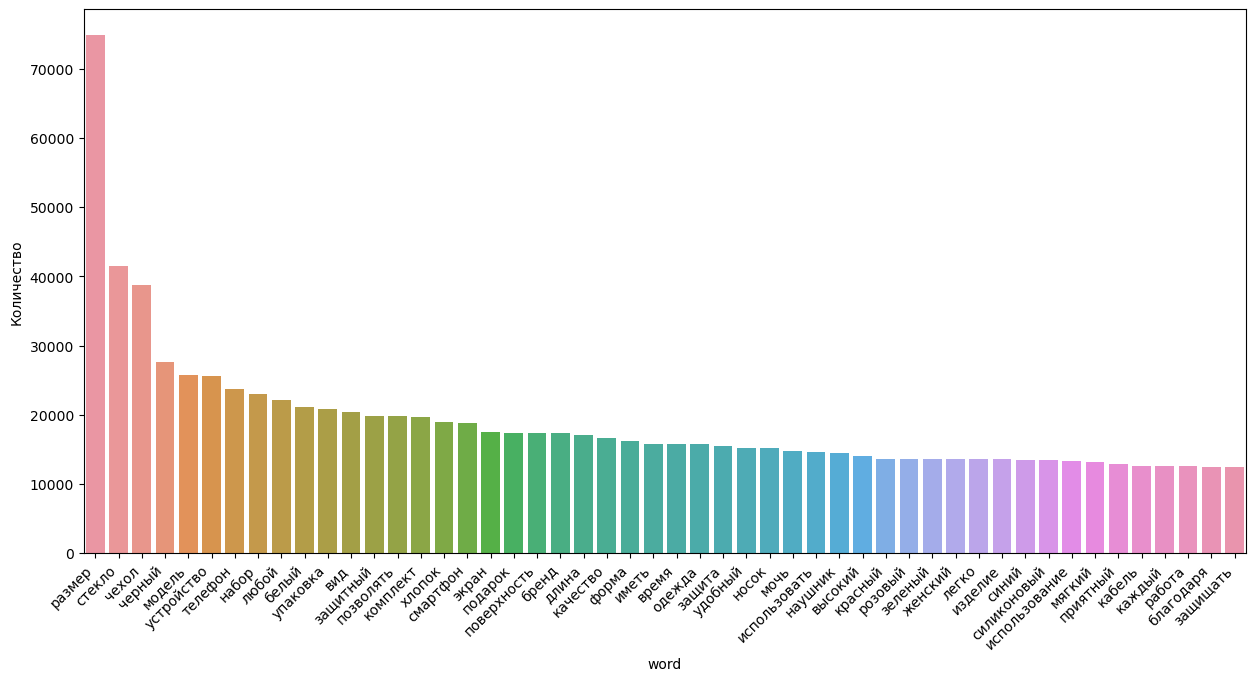

In [17]:
# –í—ã–≤–µ–¥–µ–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ 50 —Å–ª–æ–≤

def words_frequency(df, top_n = 50):  
    d = df.nlargest(columns='count', n=top_n) 
    fig, ax = plt.subplots(figsize=(15,8))
    ax = sns.barplot(data=d, x='word', y='count')
    ax.set(ylabel='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
    fig.autofmt_xdate(rotation=45);
    plt.show();
    
words_frequency(words_df)

In [19]:
# –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç —Ç–æ–∫–µ–Ω–µ–∑–∏—Ä–æ–≤–∞–Ω—ã, –ø—Ä–∏ —ç—Ç–æ–º –Ω–µ —É—á–∏—Ç—ã–≤–∞–µ–º —Å–ª–æ–≤–∞, –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è –µ–¥–∏–Ω–æ–∂–¥—ã. –ó–∞—Ç–µ–º 
# –æ–±—É—á–∞–µ–º –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–π Tokenizer –∏–∑ tensorflow.keras.preprocessing.text. –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ —Ñ–∏–∫—Å–∏—Ä—É–µ–º seed=1

tf.random.set_seed(42)

num_words=len(words_df[words_df['count'] >= 2])

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts([all_words])
total_words = len(tokenizer.word_index)+1
print('–í—Å–µ–≥–æ —Ç–æ–∫–µ–Ω–æ–≤ - ',total_words)

–í—Å–µ–≥–æ —Ç–æ–∫–µ–Ω–æ–≤ -  60538


In [20]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ç–æ–∫–µ–Ω—ã –≤ —á–∏—Å–ª–æ–≤—É—é –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é Tokenizer tensorflow, –∞ —Ç–∞–∫–∂–µ —Ä–∞—Å—á–∏—Ç—ã–≤–∞–µ–º –¥–ª–∏–Ω—É –∫–∞–∂–¥–æ–π 
# –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏

df_train['title_tokenized'] = tokenizer.texts_to_sequences(df_train.title)
df_train['title_tokens_amount'] = df_train.title_tokenized.apply(lambda x: len(x))
df_train['description_tokenized'] = tokenizer.texts_to_sequences(df_train.description)
df_train['description_tokens_amount'] = df_train.description_tokenized.apply(lambda x: len(x))
df_train['characteristics_tokenized'] = tokenizer.texts_to_sequences(df_train.characteristics)
df_train['characteristics_tokens_amount'] = df_train.characteristics_tokenized.apply(lambda x: len(x))
df_train.drop(columns=['title', 'description', 'characteristics'])
df_train.head(3)

category_id                                              title  \
0        12171                              –∑–∞—Ä—è–¥–Ω—ã–π –∫–∞–±–µ–ª—å –∞–π—Ñ–æ–Ω   
1        14233                                              —Ç—Ä—É—Å—ã   
3        13429  –≥—É–∞—à—å —é–Ω—ã–π –≤–æ–ª—à–µ–±–Ω–∏–∫ —Ü–≤–µ—Ç–æ–∫ –±–æ–ª—å—à–æ–π –±–∞–Ω–æ—á–∫–∞ –≤—ã...   

                                         description  \
0  –∑–∞—Ä—è–¥–Ω—ã–π –∫–∞–±–µ–ª—å –∑–∞—Ä—è–¥–∫–∞ –≥–∞–¥–∂–µ—Ç –∞–∫—Å–µ—Å—Å—É–∞—Ä —Ä–∞–∑—ä–µ...   
1  —Ç—Ä—É—Å—ã —Å–ª–∏–ø —ç–ª–∞—Å—Ç–∏—á–Ω—ã–π –±–µ—Å—à–æ–≤–Ω—ã–π —Ç—Ä–∏–∫–æ—Ç–∞–∂ –æ–¥–Ω–æ—Ç...   
3  –≥—É–∞—à—å –≤—ã—Å–æ–∫–∏–π –∫–∞—á–µ—Å—Ç–≤–æ —é–Ω–ª–∞–Ω–¥–∏—è –ø–æ–º–æ–≥–∞—Ç—å —Å–æ–∑–¥–∞...   

                    characteristics                           title_tokenized  \
0                 9031 —á–µ—Ä–Ω—ã–π –±–µ–ª—ã–π                            [217, 46, 962]   
1  18305 —Ä–∞–∑–º–µ—Ä –æ–¥–µ–∂–¥–∞ s –±—Ä–µ–Ω–¥ sela                                     [272]   
3              16357 –±—Ä–µ–Ω–¥ —é–Ω–ª–∞–Ω–¥–∏—è  [2720, 2808, 8737, 67, 135, 895, 34, 23]   

   title_tokens_amount                              description_tokenized  \
0                    3  [217, 46, 59, 403, 109, 75, 442, 273, 59, 443,...   
1                    1  [272, 1291, 189, 1602, 807, 363, 69, 276, 439,...   
3                    8  [2720, 34, 23, 4383, 62, 126, 2808, 513, 401, ...   

   description_tokens_amount     characteristics_tokenized  \
0                         20                [12785, 4, 10]   
1                         18  [2020, 1, 27, 194, 21, 2021]   
3                         17              [7409, 21, 4383]   

   characteristics_tokens_amount  
0                              3  
1                              6  
3                              3

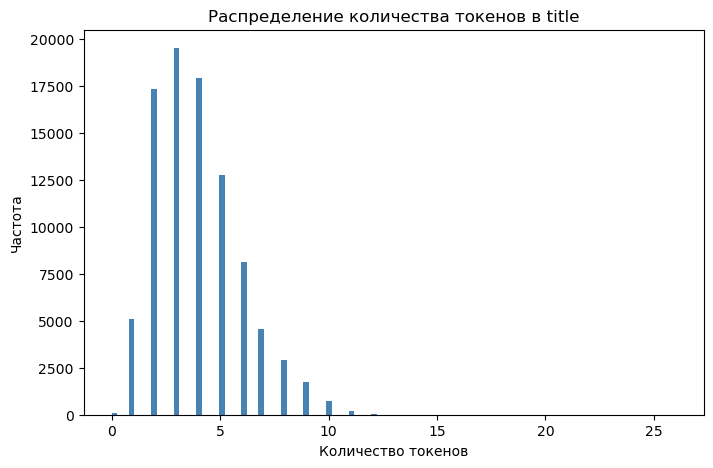

In [21]:
# –í—ã–≤–æ–¥–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–æ–∫–µ–Ω–æ–≤ –≤ title_tokenized, description_tokenized –∏ characteristics_tokenized

plt.figure(figsize=(8, 5))
plt.hist(df_train.title_tokens_amount, bins=100, color='steelblue')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–∫–µ–Ω–æ–≤')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–æ–∫–µ–Ω–æ–≤ –≤ title')
plt.show();

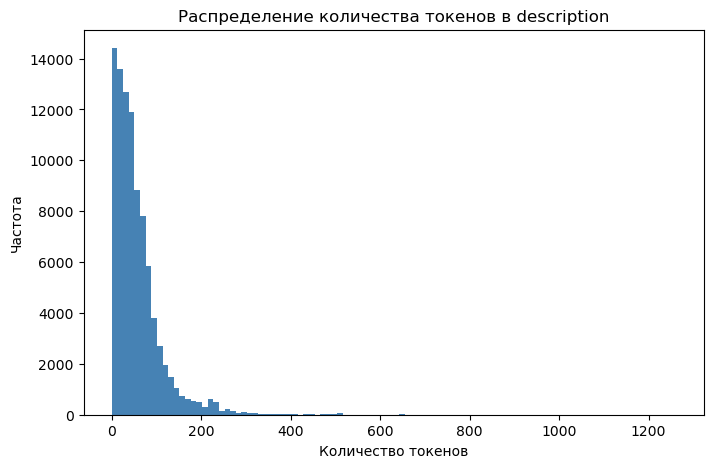

In [22]:
plt.figure(figsize=(8, 5))
plt.hist(df_train.description_tokens_amount, bins=100, color='steelblue')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–∫–µ–Ω–æ–≤')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–æ–∫–µ–Ω–æ–≤ –≤ description')
plt.show();

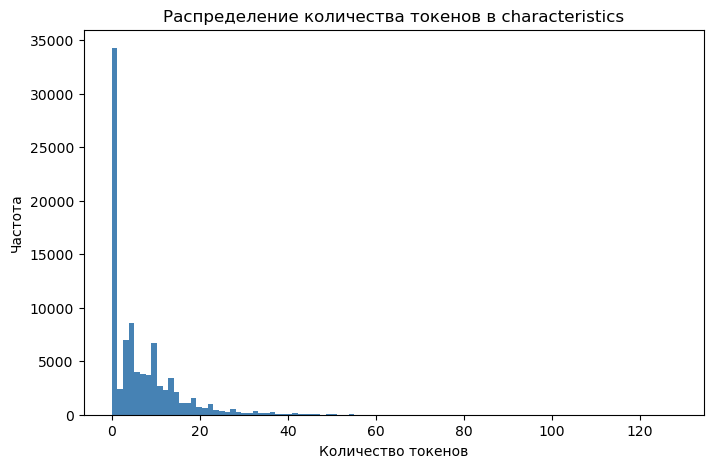

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(df_train.characteristics_tokens_amount, bins=100, color='steelblue')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–∫–µ–Ω–æ–≤')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–æ–∫–µ–Ω–æ–≤ –≤ characteristics')
plt.show();

In [24]:
# –£–¥–∞–ª—è–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ —Ç–æ–ª—å–∫–æ –æ–¥–Ω–∏–º —Ç–æ–≤–∞—Ä–æ–º –≤ –≤—ã–±–æ—Ä–∫–µ

freq = df_train.category_id.value_counts()
rare = list(freq.index[freq < 2])
for cat in rare:
    df_train = df_train[df_train.category_id != cat]

In [25]:
# –§–∏–∫—Å–∏—Ä—É–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Ç–æ–≤–∞—Ä–æ–≤ –∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∏—Ö —Å –ø–æ–º–æ—â—å—é LabelEncoder –∏ –º–µ—Ç–æ–¥–∞ to_categorical tensorflow

num_classes = df_train.category_id.nunique()
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df_train.category_id)
y = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)
print('–ò—Ç–æ–≥–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π - ', num_classes)

–ò—Ç–æ–≥–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π -  870


In [26]:
# –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏ –≤ —Å–æ–æ—Ç–≤–Ω–æ—à–µ–Ω–∏–∏ 80/20 —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è —Ç–æ–≤–∞—Ä–æ–≤ —Ä–∞–∑–Ω—ã—Ö 
# –∫–∞—Ç–µ–≥–æ—Ä–∏–π

Xtrain, Xval, ytrain, yval = train_test_split(df_train[['title_tokenized', 'description_tokenized', 'characteristics_tokenized']], 
                                              y, train_size=0.8, stratify=y, random_state=42)
print(f'–†–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ - {Xtrain.shape}\n–†–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ - {Xval.shape}')

–†–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ - (72892, 3)
–†–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ - (18224, 3)


In [27]:
# –°–æ–∑–¥–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –∏–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞

def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [28]:
# –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤—ã–ø–æ–ª–Ω—è–µ–º —Ä–∞—Å—á–µ—Ç –∏–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞ –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π, —Å –ø–æ–º–æ—â—å—é 
# –º–µ—Ç–æ–¥–∞ pad_sequences tensorflow –ø—Ä–∏–≤–æ–¥–∏–º –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤ –∫–∞–∂–¥–æ–º –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∫ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π –¥–ª–∏–Ω–µ(–∫–æ—Ä–æ—Ç–∫–∏–µ 
# –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –±—É–¥—É—Ç –¥–æ–ø–æ–ª–Ω–µ–Ω—ã –Ω—É–ª—è–º–∏ —Å –∫–æ–Ω—Ü–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –¥–æ –¥–ª–∏–Ω—ã, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω–æ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ –∏–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ 
# —Ä–∞–∑–º–∞—Ö–∞, –¥–ª–∏–Ω–Ω—ã–µ –±—É–¥—É—Ç —É—Å–µ—á–µ–Ω—ã –¥–æ –Ω–µ–µ –∂–µ). –î–∞–ª–µ–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –±—É–¥—É—Ç –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã –≤ –µ–¥–∏–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫.
len_list = []
Xtrain_np = np.empty(shape=[len(Xtrain), 0], dtype='int32')
Xval_np = np.empty(shape=[len(Xval), 0], dtype='int32')
for feat in ['title', 'description', 'characteristics']:
    boundaries = calculate_outliers(df_train[feat+'_tokens_amount'])
    print(f'–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ –∏–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞ –¥–ª—è –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π –≤ {feat} - {boundaries[1]}')
    len_sequence = round(boundaries[1])
    len_list.append(len_sequence)
    Xtrain_temp = pad_sequences(Xtrain[feat+'_tokenized'], maxlen=len_sequence, padding='post')
    Xtrain_np = np.append(Xtrain_np, Xtrain_temp, axis=1)
    Xval_temp = pad_sequences(Xval[feat+'_tokenized'], maxlen=len_sequence, padding='post')
    Xval_np = np.append(Xval_np, Xval_temp, axis=1)
Xtrain = Xtrain_np
Xval = Xval_np
len_sequence = Xtrain.shape[1]
print('–†–∞–∑–º–µ—Ä –∏—Ç–æ–≥–æ–≤–æ–≥–æ –≤—Ö–æ–¥–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ - ', Xtrain.shape)

–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ –∏–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞ –¥–ª—è –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π –≤ title - 8.0
–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ –∏–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞ –¥–ª—è –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π –≤ description - 153.5
–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ –∏–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞ –¥–ª—è –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π –≤ characteristics - 23.5
–†–∞–∑–º–µ—Ä –∏—Ç–æ–≥–æ–≤–æ–≥–æ –≤—Ö–æ–¥–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ -  (72892, 186)


In [29]:
# –°—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ñ—Ä–µ–π–º–≤–æ—Ä–∫–∞ Tensorflow. –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π 
# —Å–ª–æ–π —ç–º–±–µ–¥–¥–∏–Ω–≥, 3 —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö —Å–ª–æ—è Conv1d, –ø–æ—Å–ª–µ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –Ω–∏—Ö –¥–æ–±–∞–≤–ª–µ–Ω—ã —Å–ª–æ–∏ BatchNormalization, MaXPooling –∏ Dropout –¥–ª—è
# –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –∑–∞—Ç—É—Ö–∞–Ω–∏—è(–∏–ª–∏ –≤–∑—Ä—ã–≤–∞) –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤, —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –∏ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è —Å–¥–≤–∏–≥–æ–≤ –æ–±—ä–µ–∫—Ç–æ–≤/—Ç–æ–∫–µ–Ω–æ–≤, –∏ 
# –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–µ—Ä–æ–±—É—á–µ–Ω–∏—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ. –î–∞–ª–µ–µ 2 –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã—Ö —Å–ª–æ—è —Å 512 –∏ 870 –Ω–µ–π—Ä–æ–Ω–∞–º–∏ –∏ –≤—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π.

input = Input(shape=(len_sequence,))
embed = Embedding(num_words, 64, input_length=len_sequence)(input)

conv1 = Conv1D(512, kernel_size=8, padding='same', activation='relu')(embed)
batch1 = BatchNormalization()(conv1)
pool1 = MaxPooling1D()(batch1)
drop1 = Dropout(0.4)(pool1)

conv2 = Conv1D(256, kernel_size=4, padding='same', activation='relu')(drop1)
batch2 = BatchNormalization()(conv2)
pool2 = MaxPooling1D()(batch2)
drop2 = Dropout(0.4)(pool2)

conv3 = Conv1D(128, kernel_size=4, padding='same', activation='relu')(drop2)
batch3 = BatchNormalization()(conv3)
pool3 = MaxPooling1D()(batch3)
drop3 = Dropout(0.4)(pool3)
flat = Flatten()(drop3)

dense1 = Dense(512, activation='relu')(flat)
batch4 = BatchNormalization()(dense1)
drop4 = Dropout(0.4)(batch4)
dense2 = Dense(num_classes, activation='relu')(drop4)

output = Dense(num_classes, activation='softmax', kernel_regularizer=L2(l2=0.01))(dense2)

model = Model(inputs=input, outputs=output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 186)]             0         
                                                                 
 embedding (Embedding)       (None, 186, 64)           2518656   
                                                                 
 conv1d (Conv1D)             (None, 186, 512)          262656    
                                                                 
 batch_normalization (BatchN  (None, 186, 512)         2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 93, 512)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 93, 512)           0     

In [30]:
# –í –∫–∞—á–µ—Å—Ç–≤–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ –≤—ã–±–∏—Ä–∞–µ–º Adam (–æ–Ω –ø–æ–∫–∞–∑–∞–ª —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ª—É—á—à–µ, —á–µ–º RMSProp –Ω–∞ —ç—Ç–∞–ø–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤) —Å lerning_rate=0.001,
# —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å - categorical_crossentropy, –º–µ—Ç—Ä–∏–∫–∞ - f1_score_weighted

adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, 
              metrics = [tfa.metrics.F1Score(num_classes=num_classes, average='weighted')])

In [31]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ 100 —ç–ø–æ—Ö–∞—Ö —Å —Ä–∞–∑–º–µ—Ä–æ–º –ø–∞—Ä—Ç–∏–∏/batch_size 128

history = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), 
                    epochs=30, batch_size=128, verbose=1)

Epoch 1/30
570/570 [==============================] - 52s 85ms/step - loss: 4.5443 - f1_score: 0.2590 - val_loss: 4.0767 - val_f1_score: 0.2558
Epoch 2/30
570/570 [==============================] - 48s 84ms/step - loss: 2.2604 - f1_score: 0.5612 - val_loss: 1.9082 - val_f1_score: 0.6183
Epoch 3/30
570/570 [==============================] - 47s 83ms/step - loss: 1.6751 - f1_score: 0.6726 - val_loss: 1.6097 - val_f1_score: 0.6811
Epoch 4/30
570/570 [==============================] - 47s 83ms/step - loss: 1.3561 - f1_score: 0.7368 - val_loss: 1.4094 - val_f1_score: 0.7289
Epoch 5/30
570/570 [==============================] - 47s 83ms/step - loss: 1.1405 - f1_score: 0.7828 - val_loss: 1.3399 - val_f1_score: 0.7507
Epoch 6/30
570/570 [==============================] - 48s 83ms/step - loss: 0.9981 - f1_score: 0.8133 - val_loss: 1.2698 - val_f1_score: 0.7623
Epoch 7/30
570/570 [==============================] - 47s 83ms/step - loss: 0.8800 - f1_score: 0.8362 - val_loss: 1.2570 - val_f1_score:

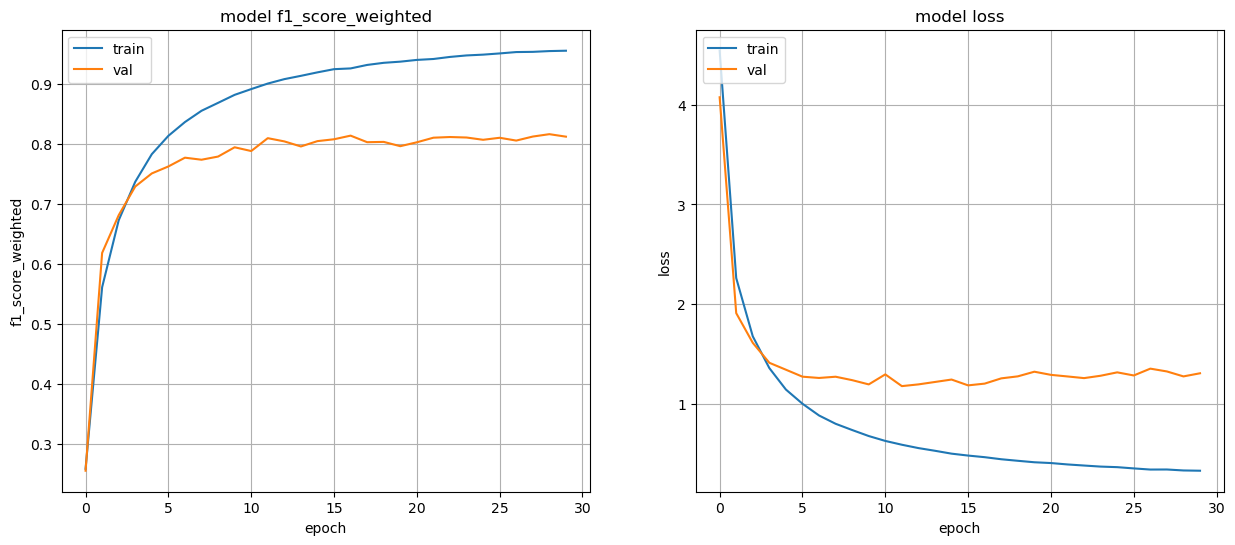

In [32]:
# –í—ã–≤–æ–¥–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(history.history['f1_score'])
ax[0].plot(history.history['val_f1_score'])
ax[0].set_title('model f1_score_weighted')
ax[0].set_ylabel('f1_score_weighted')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='upper left')
ax[0].grid();

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper left')
ax[1].grid();

In [34]:
# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏

score = model.evaluate(Xval, yval, batch_size=128, verbose=0)
print('\n–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ f1_score_weighted –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:', round(score[1], 4))


–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ f1_score_weighted –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.8119


In [35]:
# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –º–æ–¥–µ–ª—å—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, –∑–∞—Ç–µ–º –ø–æ–ª—É—á–∞–µ–º –∏–∑ –Ω–µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∞ –∏ –ø—Ä–∏–º–µ–Ω—è–µ–º –æ–±—Ä–∞—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
# –∫ –Ω–∏–º —Å –ø–æ–º–æ—â—å—é LabelEncoder.

y_proba = model.predict(Xval, verbose = 0)
y_pred = np.empty((0, 1))
for i in range(0, len(y_proba)):
    y_pred = np.append(y_pred, np.argmax(y_proba[i]))
y_pred = y_pred.astype(int)
y_pred = encoder.inverse_transform(y_pred)

# –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –≤—ã–ø–æ–ª–Ω—è–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
y_val = np.empty((0, 1))
for i in range(0, len(yval)):
    y_val = np.append(y_val, np.argmax(yval[i]))
y_val = y_val.astype(int)
y_val = encoder.inverse_transform(y_val)

In [54]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏

df_test = pq.read_table('test.parquet').to_pandas()

# –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ —Å–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
result = df_test[['product_id']]

# –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –≤—ã–ø–æ–ª–Ω—è–µ–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π
text_fields = [json.loads(elem) for elem in df_test.text_fields.tolist()]
idx = df_test.index.tolist()

df = pd.DataFrame(text_fields, index=idx)
df.description = df.apply(lambda x: str(x.description) + ' ' + str(x.attributes), axis=1)
df['characteristics'] = df.apply(lambda x: str(x.custom_characteristics) + str(x.defined_characteristics) + str(x.filters), axis=1)
df.drop(columns=['custom_characteristics', 'defined_characteristics', 'filters', 'attributes'], inplace=True)

df_test = pd.concat([df_test, df], axis=1)
df_test.drop(columns=['text_fields'], inplace=True)

df_test['title'] = clean_text(df_test.title.tolist(), 'ru_simb')
df_test['description'] = clean_text(df_test.description.tolist(), 'ru_simb')
df_test['characteristics'] = clean_text(df_test.characteristics.tolist(), 'without_punctuation')

df_test.characteristics = df_test.characteristics.apply(lambda x: ' '.join([i for n, i in enumerate(x.split())
                                                                            if i not in x.split()[:n]]))
df_test.characteristics = df_test.apply(lambda x: str(x.shop_id) + ' ' + x.characteristics, axis=1)
df_test.drop(columns=['shop_id', 'shop_title', 'rating', 'sale'], inplace=True)
df_test['title_tokenized'] = tokenizer.texts_to_sequences(df_test.title)
df_test['description_tokenized'] = tokenizer.texts_to_sequences(df_test.description)
df_test['characteristics_tokenized'] = tokenizer.texts_to_sequences(df_test.characteristics)
df_test.drop(columns=['title', 'description', 'characteristics'])

Xtest = np.empty(shape=[len(df_test), 0], dtype='int32')
col_names = ['title', 'description', 'characteristics']
for i in range(3):
    Xtest_temp = pad_sequences(df_test[col_names[i]+'_tokenized'], maxlen=len_list[i], padding='post')
    Xtest = np.append(Xtest, Xtest_temp, axis=1)
print('–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–≥–æ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ - ', Xtest.shape)

–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–≥–æ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ -  (16860, 186)


In [55]:
# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –º–æ–¥–µ–ª—å—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏, –ø–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∞ –∏ –ø—Ä–∏–º–µ–Ω—è–µ–º –æ–±—Ä–∞—Ç–Ω–æ–µ 
# –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫ –Ω–∏–º —Å –ø–æ–º–æ—â—å—é LabelEncoder.

y_proba = model.predict(Xtest, verbose = 0)
y_pred = np.empty((0, 1))
for i in range(0, len(y_proba)):
    y_pred = np.append(y_pred, np.argmax(y_proba[i]))
y_pred = y_pred.astype(int)
y_pred = encoder.inverse_transform(y_pred)
result['predicted_category_id'] = y_pred

In [57]:
result.head(5)

product_id  predicted_category_id
1     1997646                  13389
2      927375                  14922
3     1921513                   2803
4     1668662                  12524
5     1467778                  13770

In [58]:
result = pa.Table.from_pandas(result)
pq.write_table(result, 'result.parquet')